code to plot all feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

load data

In [2]:
import pandas as pd

path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\feature_VBL-VA001.csv'
x = pd.read_csv(path, header=None)


extract normal condition, 1st 1000 rows

In [3]:
x_norm = x.iloc[:1000, :]

extract misalignment condition, next 1000 rows

In [4]:
x_mis = x.iloc[1000:2000, :]

extract unbalance condition, next 1000 rows

In [5]:
x_unb = x.iloc[2000:3000, :]

extract bearing condition, last 1000 rows

In [6]:
x_bear = x.iloc[3000:4000, :]

plot all nine features

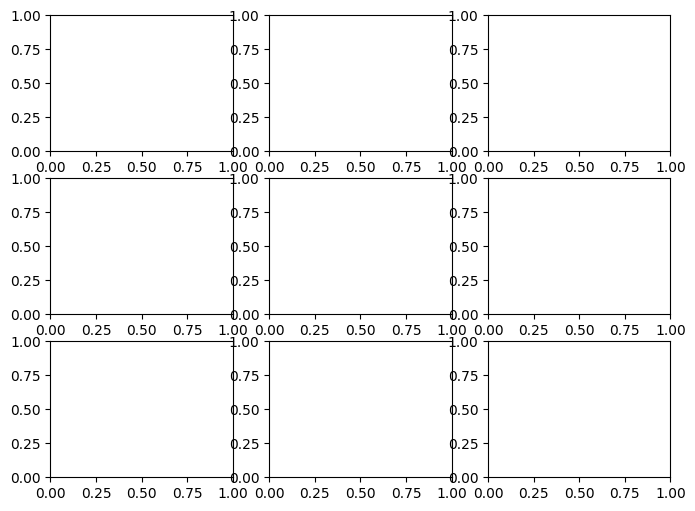

In [7]:
feat_name = ['Shape Factor', 'RMS', 'Impulse Factor', 'Peak to Peak', 'Kurtosis', 'Crest Factor', 'Mean', 'Standard Deviation', 'Skewness']
feat_n = np.arange(0, 27, 3)
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(8, 6)

In [8]:
axs = ax.ravel()
for i, n in enumerate(feat_n):
    y1 = x_norm.iloc[:, n]
    y2 = x_mis.iloc[:, n]
    y3 = x_unb.iloc[:, n]
    y4 = x_bear.iloc[:, n]
    y1 = y1.values.flatten()
    y2 = y2.values.flatten()
    y3 = y3.values.flatten()
    y4 = y4.values.flatten()

    # helper for x axis
    x = np.arange(0,len(y1),1)
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'same')
    y11 = movingaverage(y1, 30)
    y22 = movingaverage(y2, 30)
    y33 = movingaverage(y3, 30)
    y44 = movingaverage(y4, 30)

    # print(f"i = {i}, n = {n}")
    axs[i].plot(x, y11, x, y22, x, y33, x, y44)
    # Decorate
    axs[i].set_title(feat_name[i])
    axs[i].set_xlim(20,980)
    if i <= 5:
        # axs[i].get_xaxis().set_visible(False)
        axs[i].axes.xaxis.set_ticklabels([])

In [9]:
plt.show()
# plt.savefig('feature_z_axis.pdf')
# save manually for better quality, then crop